In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import json
import sys
import os
import matplotlib
#matplotlib.use('Agg') 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
import pdb
#import ipdb
import h5py
import importlib
import pickle
import math

# Add root folder to sys path
sys.path.append("../")

from load_expert_traj import recursively_save_dict_contents_to_group

# %pylab inline
# inline doesn't give interactive plots
%matplotlib inline 
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

sns.set()

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Import own modules
# Need to use importlib since module starts with a numerical value.

/home/arjun/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


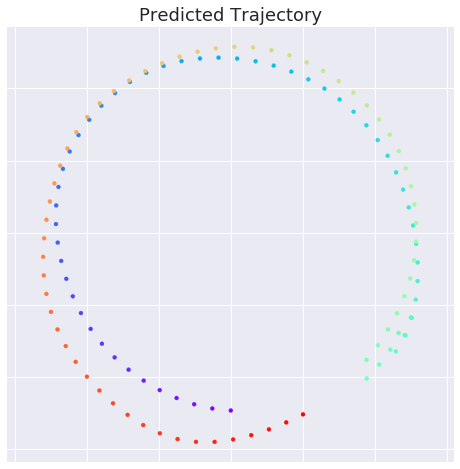

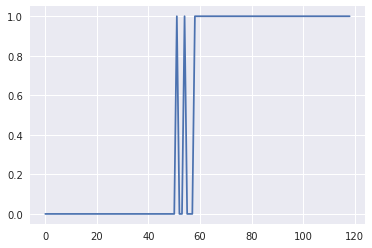

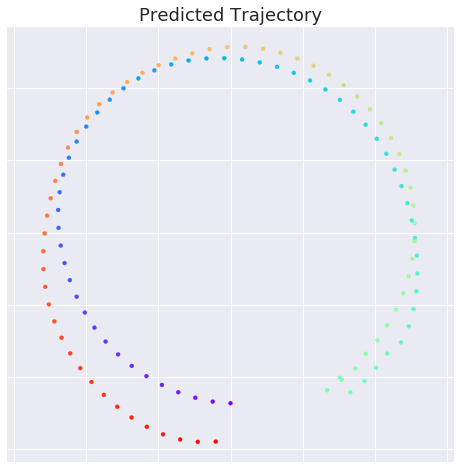

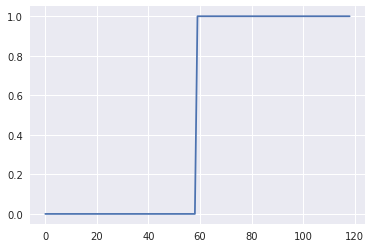

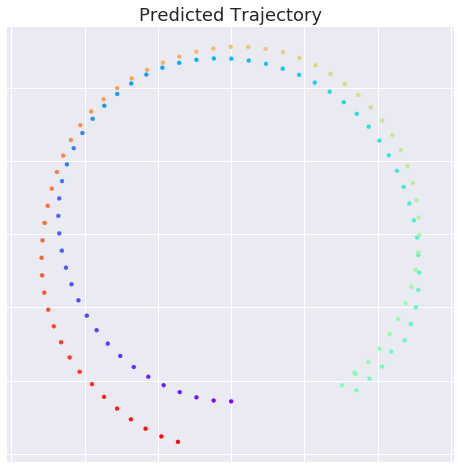

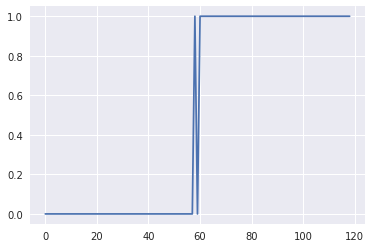

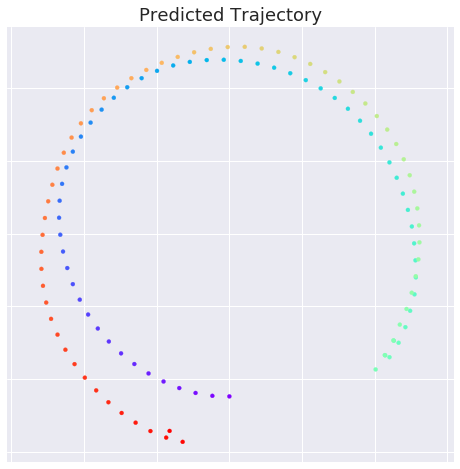

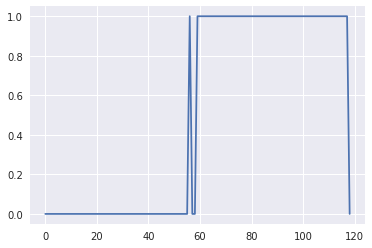

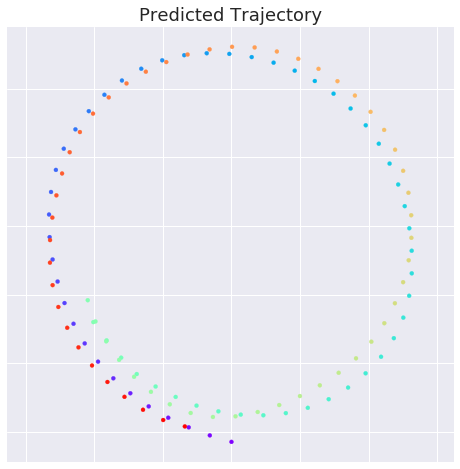

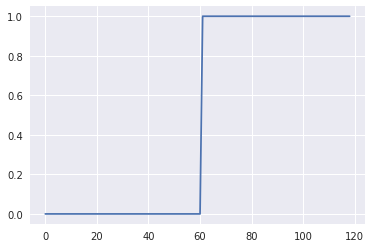

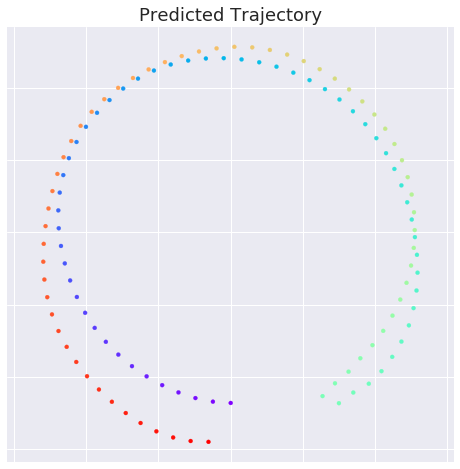

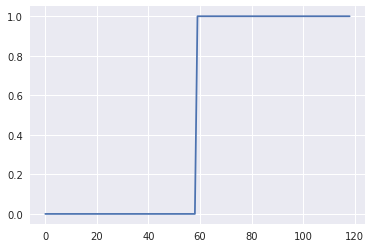

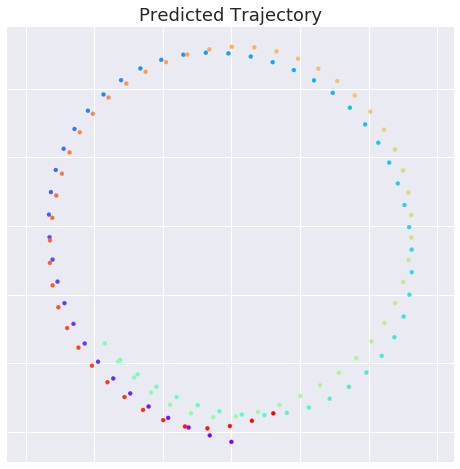

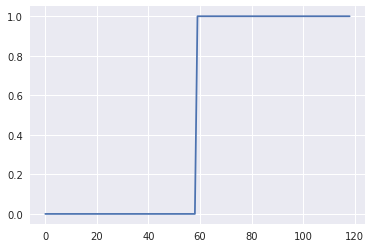

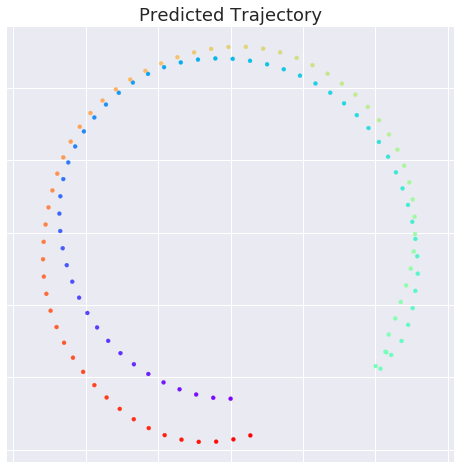

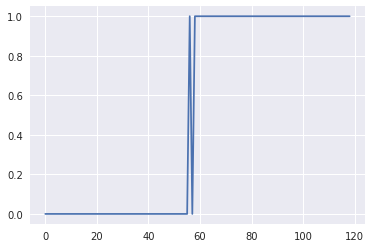

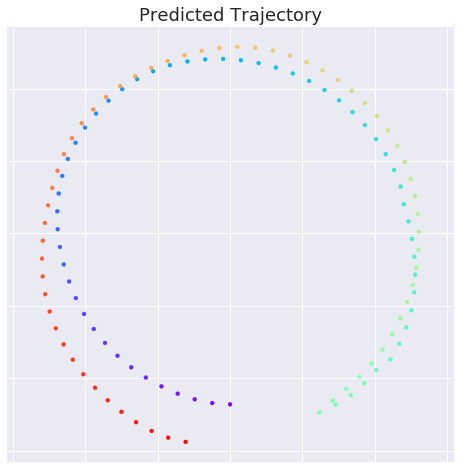

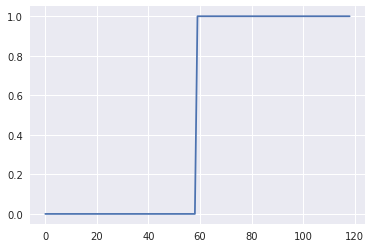

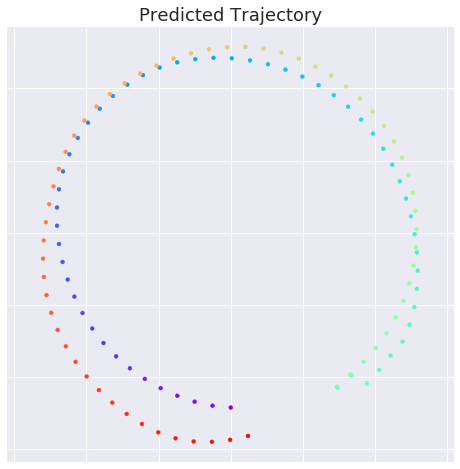

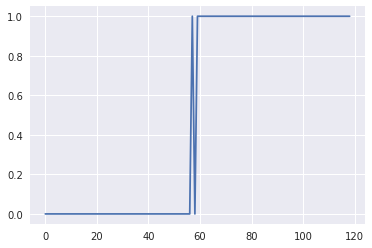

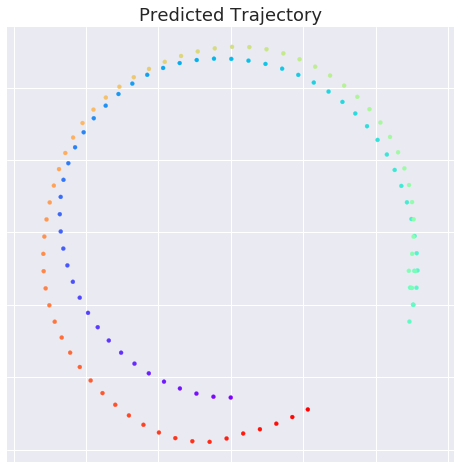

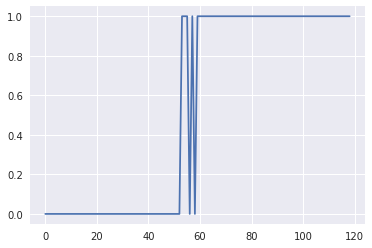

In [2]:
# pkl_path = '/tmp/mohit_circle_traj_smooth_transition_with_reward/results.pkl'
# pkl_path = '../results/circle/vae/tmp/mohit_circle_traj_len_362_with_reward_no_history_in_policy/results.pkl'
# pkl_path = '../results/vae/tmp/meta_1_traj_50_policy_output_normalized_context_3_goal_1_history_4/results_495.pkl'
# pkl_path = '../results/vae/tmp/meta_1_traj_50_traj_len_180_policy_output_normalized_context_3_goal_1_history_5_epoch_1000_temperature_5_noisy_next_state/results_435.pkl'
# pkl_path = '../results/vae/tmp/meta_1_traj_50_traj_len_180_policy_output_normalized_context_3_goal_1_history_5_epoch_1000_temperature_5_noisy_next_state_lr_1e-4/results_cp_500.pkl'
# pkl_path = '../results/vae/tmp/meta_1_traj_50_traj_len_180_policy_output_normalized_context_3_goal_1_history_5_epoch_1000_temperature_5_noisy_next_state_lr_1e-4_different_omega/results_400.pkl'

#arjun_pkl_path = '../results/circle/gail/old/meta_1_traj_100_opposite_circles_equal_radii_action_policy_output_normalized_context_2_goal_1_posterior_lambda_0.1_history_1_lr_1e-5_pretrained_policy/results/results_cp_4500.pkl'

#mohit_pkl_path = '../results/circle/gail/meta_1_traj_100_opposite_circles_equal_radii_action_policy_output_normalized_context_2_goal_1_posterior_lambda_0.1_history_1_posterior_0.1_lr_1e-4/results_cp_3000.pkl'
#mohit_pkl_path = '../results/circle/gail/meta_1_traj_100_opposite_circles_equal_radii_action_policy_output_normalized_context_2_goal_1_history_1_posterior_0.1_lr_1e-4/results_cp_1900.pkl'
#mohit_pkl_path = '../results/circle/gail/meta_1_traj_100_opposite_circles_equal_radii_action_policy_output_normalized_context_2_goal_1_posterior_lambda_0.1_history_1_posterior_0.001_lr_1e-4/results_cp_2000.pkl'

#arjun_pkl_path = '../results/circle/gail/meta_1_traj_100_opposite_circles_equal_radii/action_policy_output_normalized/context_2_goal_1_history_1/disc_with_nextc_posterior_0.01_lr_1e-4_with_policy_l2_0.1/results_cp_600.pkl'
#arjun_pkl_path = '../results/circle/gail/meta_1_traj_100_opposite_circles_equal_radii/action_policy_output_normalized/context_2_goal_1_history_1/disc_with_nextc_posterior_0.001_lr_1e-4_with_policy_l2_0.1/results_cp_600.pkl'
#arjun_pkl_path = '../results/circle/gail/meta_1_traj_100_opposite_circles_equal_radii/action_policy_output_normalized/context_2_goal_1_history_1/disc_with_nextc_posterior_0.01_lr_1e-4_with_policy_l2_0.01/results_cp_600.pkl'
#arjun_pkl_path = '../results/circle/gail/meta_1_traj_100_opposite_circles_equal_radii/action_policy_output_normalized/context_2_goal_1_history_1/disc_with_nextc_posterior_0.001_lr_1e-4_with_policy_l2_0.01/results_cp_600.pkl'
#arjun_pkl_path = '../results/circle/gail/meta_1_traj_100_opposite_circles_equal_radii/action_policy_output_normalized/context_2_goal_1_history_1/disc_with_nextc_posterior_0.01_lr_1e-4_with_policy_l2_0.001/results_cp_600.pkl'
#arjun_pkl_path = '../results/circle/gail/meta_1_traj_100_opposite_circles_equal_radii/action_policy_output_normalized/context_2_goal_1_history_1/disc_with_nextc_posterior_0.001_lr_1e-4_with_policy_l2_0.001/results_cp_600.pkl'

arjun_pkl_path = '../results/circle/gail/meta_1_traj_100_opposite_circles_equal_radii/action_policy_output_normalized/context_2_goal_1_history_1/disc_with_nextc_posterior_0.01_lr_1e-4_with_policy_l2_0.1/opposite_dir/results_cp_600.pkl'
pkl_path = arjun_pkl_path

#colors = cm.rainbow(np.linspace(0, 1, pred_traj.shape[0]))
#sns.palplot(colors)

with open(pkl_path, 'rb') as pkl_f:
    results_data = pickle.load(pkl_f)
save_data_path = \
    '../circle_results/meta_1_traj_100_opposite_circles_equal_radii_action_policy_output_normalized_context_2_goal_1_posterior_lambda_0.1_history_1_posterior_0.001_lr_1e-4/'
for i in range(len(results_data['pred_traj_state'][0])):
    pred_traj = np.array(results_data['pred_traj_state'][0][i])[:,0,:]
    true_traj = np.array(results_data['true_traj_state'][0][i])[:,0,:]
    true_traj = np.reshape(true_traj, (true_traj.shape[0], -1))

    colors = cm.rainbow(np.linspace(0, 1, pred_traj.shape[0]))
    # sns.palplot(colors)
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(pred_traj[:, 0].tolist(), pred_traj[:, 1].tolist(),
               color=colors, s=16) 
    ax.axis('equal')    
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.set_title("Predicted Trajectory", fontsize=18)

    plt.savefig(
        '{}/result_{}.pdf'.format(save_data_path, i),
        bbox_inches='tight',
    )
    plt.show()
          
    # plt.scatter(true_traj[:, 0].tolist(), true_traj[:, 1].tolist(), color=colors, s=8) 
    # plt.axis('equal')    
    # plt.title("True traj")
    # plt.show()                    

    pred_context = np.argmax(
        np.reshape(np.array(results_data['pred_context'][0][i]), (119, -1)), axis=1)
    plt.plot(pred_context.tolist())
    plt.show()